In [16]:
import holoviews as hv
import numpy as np
hv.extension()


/Users/chiseinotoya/jupyter_notebook/env/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/chiseinotoya/jupyter_notebook/env/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/Users/chiseinotoya/jupyter_notebook/env/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/chiseinotoya/jupyter_notebook/env/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


:Layout
   .Image.I  :Image   [x,y]   (z)
   .Image.II :Image   [x,y]   (z)
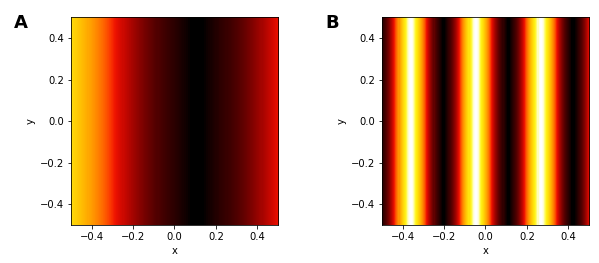

In [17]:
xvals = np.linspace(-4,0,202)
yvals = np.linspace(4,0,202)
xs,ys = np.meshgrid(xvals, yvals)

def waves_image(alpha, beta):
    return hv.Image(np.sin(((ys/alpha)**alpha+beta)*xs))

waves_image(0,0) + waves_image(0,4)

In [18]:
dmap = hv.DynamicMap(waves_image, kdims=['alpha', 'beta'])
dmap

DynamicMap cannot be displayed without explicit indexing as 'alpha', 'beta' dimension(s) are unbounded. 
Set dimensions bounds with the DynamicMap redim.range or redim.values methods.

:DynamicMap   [alpha,beta]

/Users/chiseinotoya/jupyter_notebook/env/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/chiseinotoya/jupyter_notebook/env/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


:Layout
   .Image.I  :Image   [x,y]   (z)
   .Image.II :Image   [x,y]   (z)
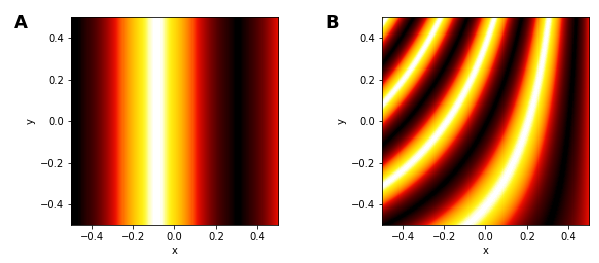

In [19]:
dmap[0,1] + dmap.select(alpha=1, beta=2)

:DynamicMap   [alpha,beta]
   :Image   [x,y]   (z)
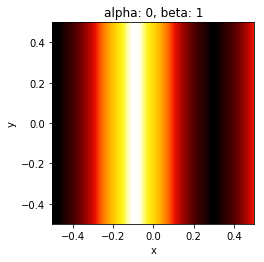

In [20]:
dmap.redim.range(alpha=(0, 5.0), beta=(1, 5.0))

/Users/chiseinotoya/jupyter_notebook/env/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/chiseinotoya/jupyter_notebook/env/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


:DynamicMap   [alpha,beta]
   :Image   [x,y]   (z)
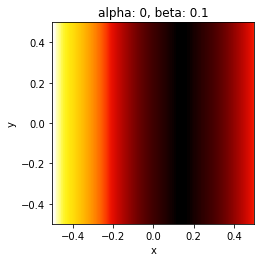

In [21]:
dmap.redim.values(alpha=[0, 1, 2], beta=[0.1, 1.0, 2.5])

In [22]:
def shapes(N, radius=0.5): # Positional keyword arguments are fine
    paths = [hv.Path([[(radius*np.sin(a), radius*np.cos(a)) 
                        for a in np.linspace(-np.pi, np.pi, n+2)]], 
                     extents=(-1,-1,1,1)) 
             for n in range(N,N+3)]
    return hv.Overlay(paths)

:Layout
   .HoloMap.I    :HoloMap   [N,radius]
      :Overlay
         .Path.I   :Path   [x,y]
         .Path.II  :Path   [x,y]
         .Path.III :Path   [x,y]
   .DynamicMap.I :DynamicMap   [N,radius]
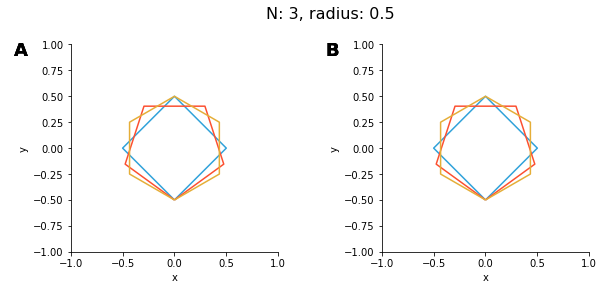
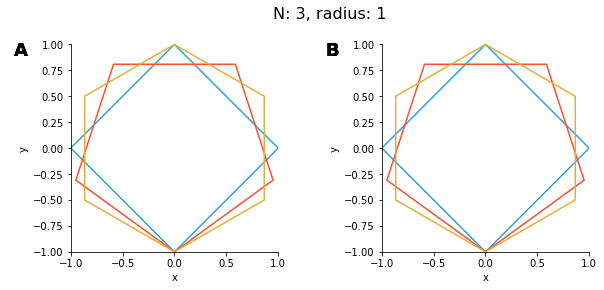
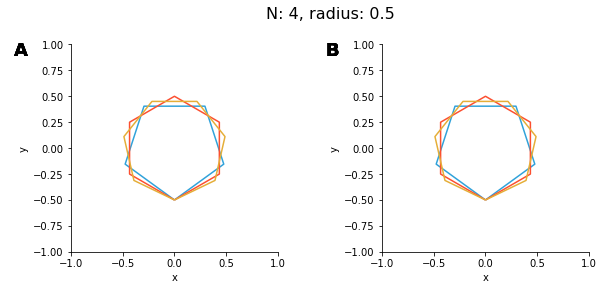
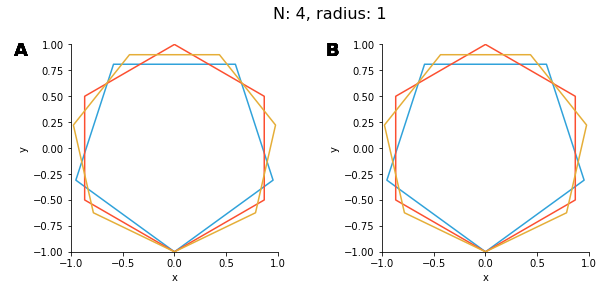
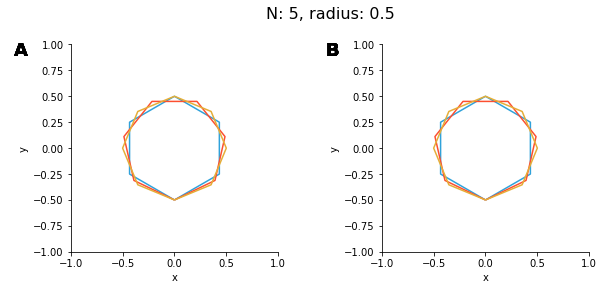
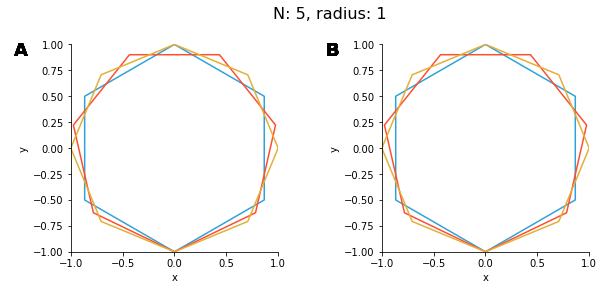
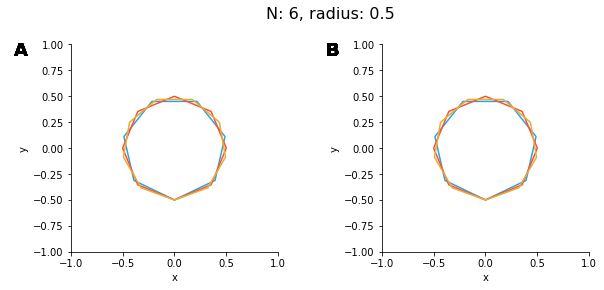
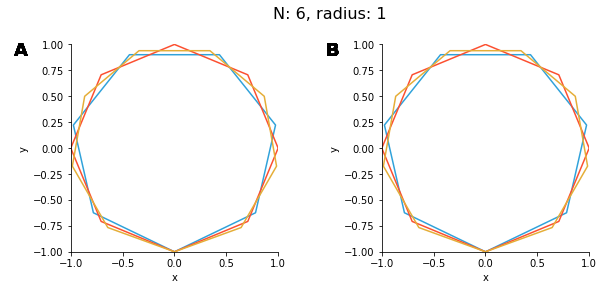
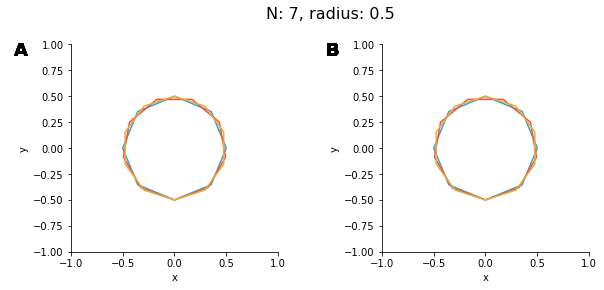
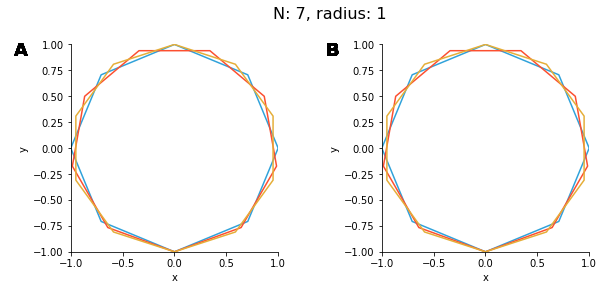

In [26]:
%%opts Path (linewidth=1.5)
holomap = hv.HoloMap({(N,r):shapes(N, r) for N in [3,4,5,6,7] for r in [0.5, 1.00]},  kdims=['N', 'radius'])
dmap = hv.DynamicMap(shapes, kdims=['N','radius'])
holomap + dmap